In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
keras.__version__

'2.2.4'

In [41]:
# Hyper parameters
batch_size = 128
nb_epoch = 100

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 500
corruption_level = 0.3

In [47]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [43]:
x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


In [44]:
# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               392784    
Total params: 785,284
Trainable params: 785,284
Non-trainable params: 0
_________________________________________________________________


/home/nebex/usys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [45]:
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

/home/nebex/usys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 192us/step - loss: 0.2722 - val_loss: 0.2238
Epoch 2/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.2026 - val_loss: 0.1836
Epoch 3/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1734 - val_loss: 0.1623
Epoch 4/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1562 - val_loss: 0.1482
Epoch 5/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1443 - val_loss: 0.1380
Epoch 6/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1354 - val_loss: 0.1302
Epoch 7/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1286 - val_loss: 0.1242
Epoch 8/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1233 - val_loss: 0.1195
Epoch 9/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.1190 - val_loss: 0

60000/60000 [==============================] - 5s 91us/step - loss: 0.0854 - val_loss: 0.0851
Epoch 78/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0853 - val_loss: 0.0851
Epoch 79/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0852 - val_loss: 0.0850
Epoch 80/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0851 - val_loss: 0.0849
Epoch 81/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.0851 - val_loss: 0.0849
Epoch 82/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.0850 - val_loss: 0.0848
Epoch 83/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0849 - val_loss: 0.0848
Epoch 84/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0849 - val_loss: 0.0847
Epoch 85/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.0848 - val_loss: 0.0846
Epoch 86/100
60000/60000 [========================

In [48]:
# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

10000/10000 [==============================] - 0s 25us/step

Summary: Loss over the test dataset: 0.08


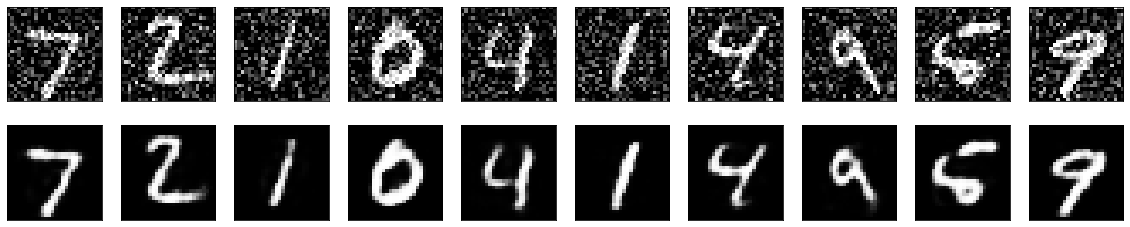

In [52]:
# Decode test images 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
